In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\project\medical.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape  #checking row and columns

(1338, 7)

In [4]:
data.isna().sum()  #checking null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# from above we observation that there is null values in data set

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# age,children,are intiger data
# sex,smoker,region, are object data
# bmi,charges are float data

In [8]:
for i in data.columns:
    print(data[i].value_counts())  # cheking all counts 
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [9]:
data.loc[data['charges']==''] # no white spaces in target value

,age,sex,bmi,children,smoker,region,charges


In [10]:
#separting numerical and categorical values
# for categorical
categorical=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical.append(i)
print('categorical=',categorical)
print('\n')
# for numerical
numerical=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical.append(i)
print('numerical=',numerical)


categorical= ['sex', 'smoker', 'region']


numerical= ['age', 'bmi', 'children', 'charges']


In [11]:
numerical

['age', 'bmi', 'children', 'charges']

In [12]:
data.nunique().to_frame('no of unique value')

,no of unique value
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [13]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
# from above row count is same in all column mens no null value
# in all column big diffrence in mean and std deviation
# maen and 50% are almost same that mean it is normal distribution (bell shape)
# there is no skewness in data 
# there is no outliers

# data visulization

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


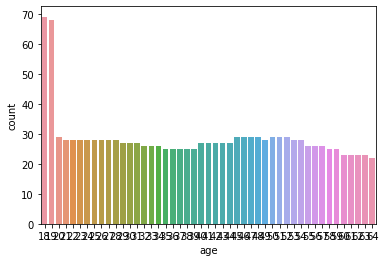

In [15]:
print(data['age'].value_counts())
ax=sns.countplot(x='age',data=data)
plt.show()

male      676
female    662
Name: sex, dtype: int64


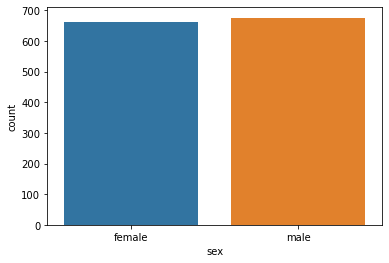

In [16]:
print(data['sex'].value_counts())
ax=sns.countplot(x='sex',data=data)
plt.show()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


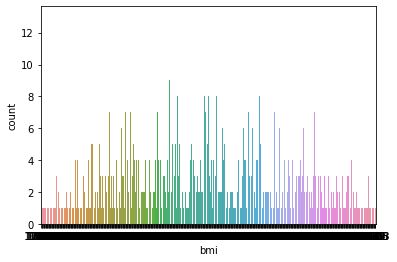

In [17]:
print(data['bmi'].value_counts())
ax=sns.countplot(x='bmi',data=data)
plt.show()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


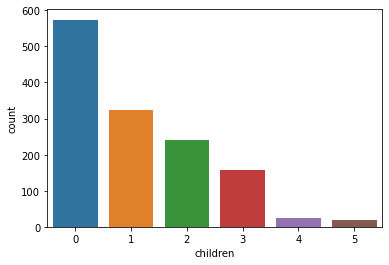

In [18]:
print(data['children'].value_counts())
ax=sns.countplot(x='children',data=data)
plt.show()

no     1064
yes     274
Name: smoker, dtype: int64


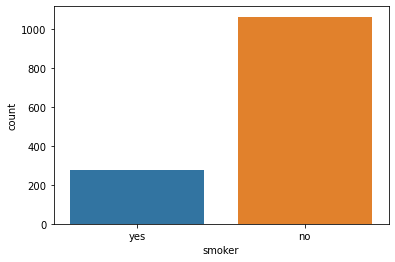

In [19]:
print(data['smoker'].value_counts())
ax=sns.countplot(x='smoker',data=data)
plt.show()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


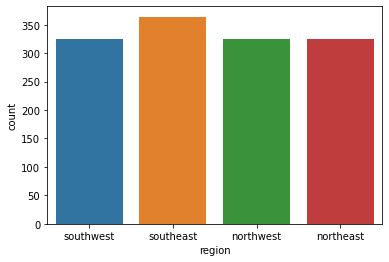

In [20]:
print(data['region'].value_counts())
ax=sns.countplot(x='region',data=data)
plt.show()

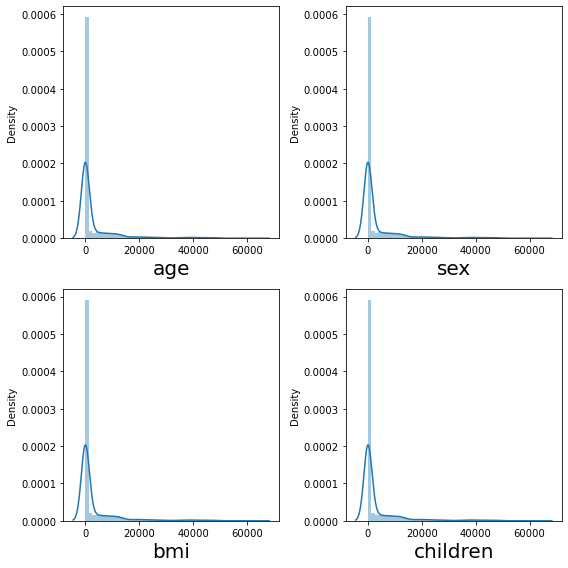

In [21]:
#cheking ditribution of plot
plt.figure(figsize=(8,8),facecolor='w')
plotnumber=1
for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[numerical])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

# SKEWNESS(-0.5 TO 0.5)

In [22]:
data.skew() #cheking skewness

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [23]:
# it is confirm from above data there is no skewness in data looks like almost normal distribution

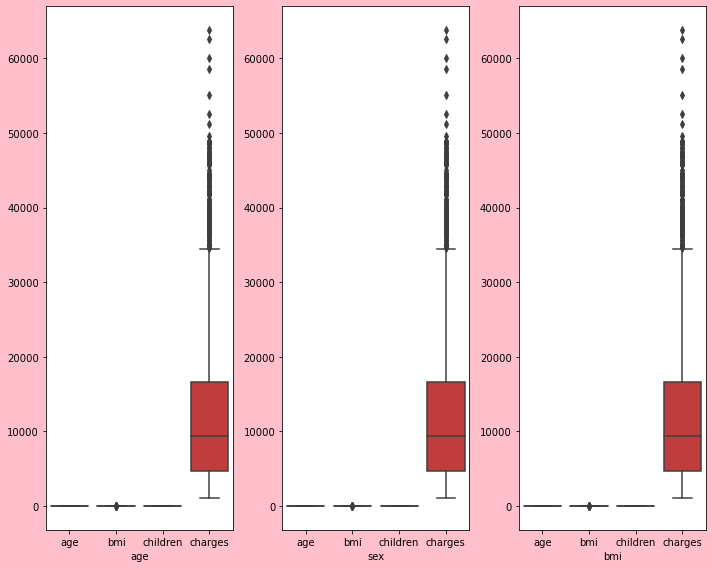

In [24]:
#cheking outliers in dataset
plt.figure(figsize=(10,8),facecolor='pink')
plotnumber=1
for column in data:
    if plotnumber<=3: #not taking outcome bcz it is 100%  real or true data
        plt.subplot(1,3,plotnumber)
        ax=sns.boxplot(data=data[numerical])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()    

In [25]:
# from above there is no outliers

# To find the relation between feature we use heat map

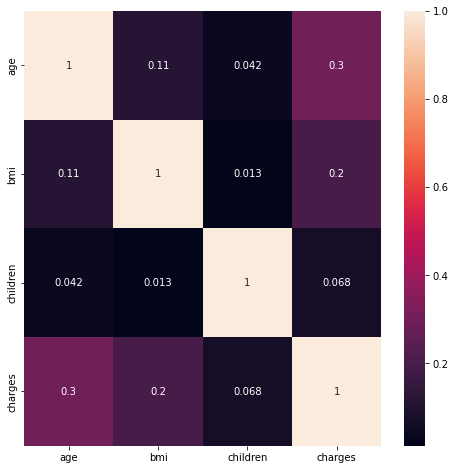

In [26]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(8,8))
sns.heatmap(relation,annot=True)
plt.show()

In [27]:
# from above plot there is no any multicolinearity issue.
# there no much -ve relation between target and feature.
# age is more related to label.

# Encoding categorical data

In [28]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))
data

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [29]:
# above categorical data change into numerical data

In [30]:
data.info()# cheking data  types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


In [31]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# cheking correlation btw target and featues

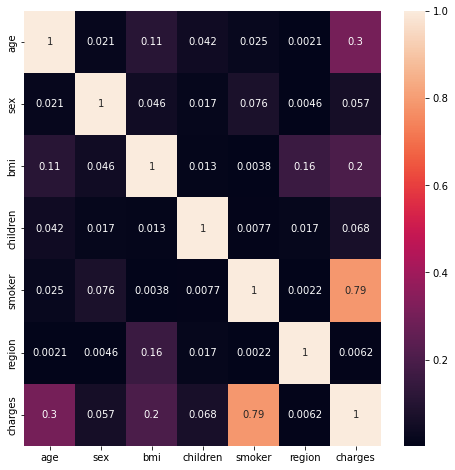

In [32]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(8,8))
sns.heatmap(relation,annot=True)
plt.show()

In [33]:
# from above plot there is no any multicolinearity issue.
# there no much -ve relation between target and feature.
# smoker is more related to label.
# region,childreen, sex, are very less related to label.
# charge and age are related to each other
# region is no contributing to labels so much so we drop it

In [34]:
relation['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
Name: charges, dtype: float64

In [35]:
# smoker is more related to label.(78%)

In [36]:
x=data.drop(columns=['charges'])
y=data['charges']

# EDA  PROCESSING IS COMPLETED

In [37]:
#for scalling features to remove baisness 
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# model buildings

In [72]:
# trainning and spliting data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=234)

In [73]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train ,y_train)

LinearRegression()

In [74]:
# i have selected linear regression bcz here in target column continious  data thats why i have selected linear regression model

In [75]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1.0,30.97,3,0.0,1.0,10600.5483
1334,18,0.0,31.92,0,0.0,0.0,2205.9808
1335,18,0.0,36.85,0,0.0,2.0,1629.8335
1336,21,0.0,25.80,0,0.0,3.0,2007.9450
1337,61,0.0,29.07,0,1.0,1.0,29141.3603


# checks some predicted charges

In [76]:
#sice we have already fit ,now we have only to transform data
print('prediction charges: ',regression.predict(scaler.transform([[50,1.0,30.97,3,0.0,1.0]]))) 

prediction charges:  [12246.70740113]


In [77]:
print('prediction charges: ',regression.predict(scaler.transform([[61,0.0,29.07,0,1.0,1.0]])))

prediction charges:  [36927.60363909]


In [78]:
#how model fit on train data
regression.score(x_train,y_train)

0.7624471437535048

In [79]:
#how model fit on test data
regression.score(x_test,y_test)

0.7131203910451537

# now you can save model 

In [81]:
y_pred=regression.predict(x_test)

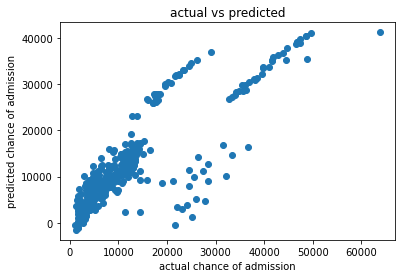

In [82]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance of admission')
plt.ylabel('predicted chance of admission')  # chreking actual vs predicted
plt.title('actual vs predicted')
plt.show()